### CREDIT CARD - SEGMENTATION CASE STUDY

#### This case requires to develop a customer segmentation to define marketing strategy.

    #1. Advanced Data Preparation -

    A. Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas_profiling\base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()

    B. Reading data into dataframe and performing exploratory analysis

    Data Description -
    The are total 18 columns in the dataset given.
    Two columns namely "CREDIT_LIMIT" and "MINIMUM_PAYMENTS" are having NULL values.
    "CREDIT_LIMIT" - NULL will be filled with median and for "MINIMUM_PAYMENTS" - NULL will be filled with ZERO.

In [2]:
credit= pd.read_csv('CC GENERAL.csv')

In [3]:
credit.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
credit.columns

Index([u'CUST_ID', u'BALANCE', u'BALANCE_FREQUENCY', u'PURCHASES',
       u'ONEOFF_PURCHASES', u'INSTALLMENTS_PURCHASES', u'CASH_ADVANCE',
       u'PURCHASES_FREQUENCY', u'ONEOFF_PURCHASES_FREQUENCY',
       u'PURCHASES_INSTALLMENTS_FREQUENCY', u'CASH_ADVANCE_FREQUENCY',
       u'CASH_ADVANCE_TRX', u'PURCHASES_TRX', u'CREDIT_LIMIT', u'PAYMENTS',
       u'MINIMUM_PAYMENTS', u'PRC_FULL_PAYMENT', u'TENURE'],
      dtype='object')

In [6]:
credit.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [7]:
pandas_profiling.ProfileReport(credit)

    C. Deriving New KPIs and NULL value handling 

    NULL Handling -

In [8]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [9]:
credit['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [10]:
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [11]:
# For CREDIT_LIMIT - We will fill the NULL with the median of CREDIT_LIMIT
credit['CREDIT_LIMIT'].fillna(value=credit['CREDIT_LIMIT'].median(), inplace = True)

In [12]:
# For MINIMUM_PAYMENTS we will fill NULL with ZERO
credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(0)

    Deriving New KPIs -

In [13]:
# 1. Monthly Avarage Purchages -
credit['MNTHLY_AVG_PURCHASE'] = credit['PURCHASES']/credit['TENURE']

In [14]:
# 2. Monthly Cash Advance -
credit['MONTHLY_AVG_CASH_ADVANCE'] = credit['CASH_ADVANCE']/credit['TENURE']

In [15]:
# function for defining purchase type
#We can see 4 types of purchase behavior - deriving categorical variables based on the behavior
def purchaagetyp(credit):
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'NONE'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES == 0)):
        return 'ONE_OFF'
    if ((credit.ONEOFF_PURCHASES > 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'BOTH_ONEOFF_INSTALLMENT'
    if ((credit.ONEOFF_PURCHASES == 0) & (credit.INSTALLMENTS_PURCHASES > 0)):
        return 'INSTALLMENTS'

In [16]:
# 3. Purchage by Type
credit['PURCHASE_TYPE'] = credit.apply(purchaagetyp, axis=1)

In [17]:
#5. LIMIT USAGE (Credit Score - Lower implies customers are maintaining their balance properly)
credit['LIMIT_USAGE'] = credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'],axis =1)

In [18]:
#6. PAYMENT_MINPAYMENT
#The where clause is being used to avoid div by zero error
credit['PAYMENT_MINPAYMENT'] = np.where(credit['MINIMUM_PAYMENTS']== 0, credit['PAYMENTS'], credit['PAYMENTS']/credit['MINIMUM_PAYMENTS'])

In [19]:
credit.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
MNTHLY_AVG_PURCHASE                 False
MONTHLY_AVG_CASH_ADVANCE            False
PURCHASE_TYPE                       False
LIMIT_USAGE                         False
PAYMENT_MINPAYMENT                  False
dtype: bool

In [20]:
credit=credit.round(2)

In [21]:
credit.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002  3202.47               0.91       0.00              0.00   
2  C10003  2495.15               1.00     773.17            773.17   
3  C10004  1666.67               0.64    1499.00           1499.00   
4  C10005   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4          0.00                 0.17   
1                     0.0       6442.95                 0.00   
2                     0.0          0.00                 1.00   
3                     0.0        205.79                 0.08   
4                     0.0          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

          ...          CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         ...                1000.0    201.80            139.51   
1         ...                7000.0   4103.03           1072.34   
2         ...                7500.0    622.07            627.28   
3         ...                7500.0      0.00              0.00   
4         ...                1200.0    678.33            244.79   

   PRC_FULL_PAYMENT  TENURE  MNTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  \
0              0.00      12                 7.95                      0.00   
1              0.22      12                 0.00                    536.91   
2              0.00      12                64.43                      0.00   
3              0.00      12               124.92                     17.15   
4              0.00      12                 1.33                      0.00   

   PURCHASE_TYPE  LIMIT_USAGE  PAYMENT_MINPAYMENT  
0   INSTALLMENTS         0.04                1.45  
1           NONE         0.46                3.83  
2        ONE_OFF         0.33                0.99  
3        ONE_OFF         0.22                0.00  
4        ONE_OFF         0.68                2.77  

[5 rows x 23 columns]

In [22]:
credit.to_csv("credit_check.csv", index= False)

    D. Insights of the newly derived KPI

In [23]:
# Avarage payment_minpayment ratio for each purchase type
credit.groupby('PURCHASE_TYPE').apply(lambda x: np.mean(x['PAYMENT_MINPAYMENT']))

PURCHASE_TYPE
BOTH_ONEOFF_INSTALLMENT    10.067787
INSTALLMENTS               20.050496
NONE                       15.328521
ONE_OFF                    41.136110
dtype: float64

#### Insights
    1 Customers with installment payments are paying dues
    2 Customers who do not do ONOFF or INSTALLMENTS take more cash advance
    3 Customers with installment purchases have good credit score

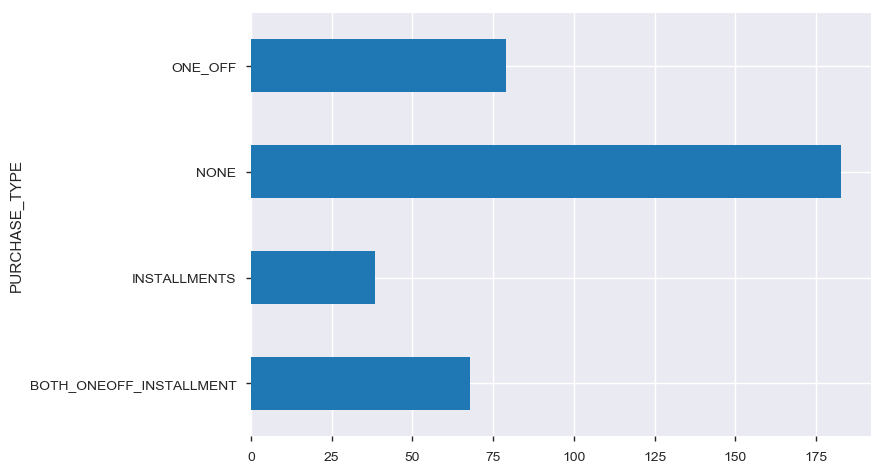

In [24]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['MONTHLY_AVG_CASH_ADVANCE'])).plot.barh()

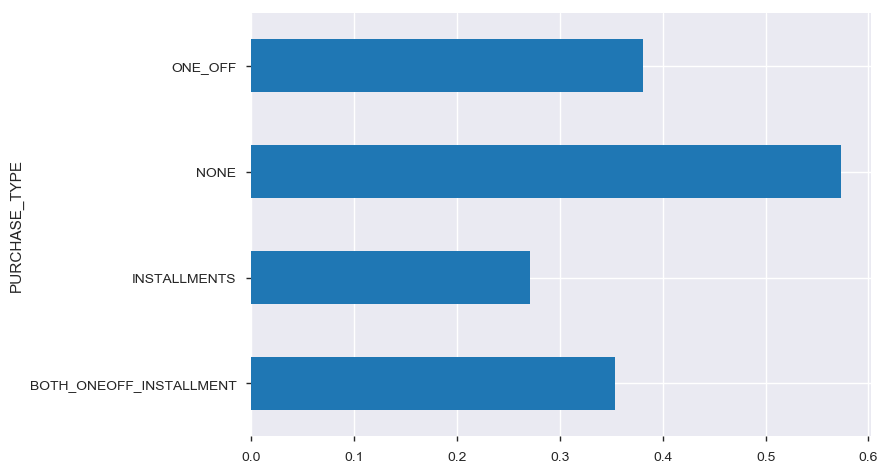

In [25]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['LIMIT_USAGE'])).plot.barh()

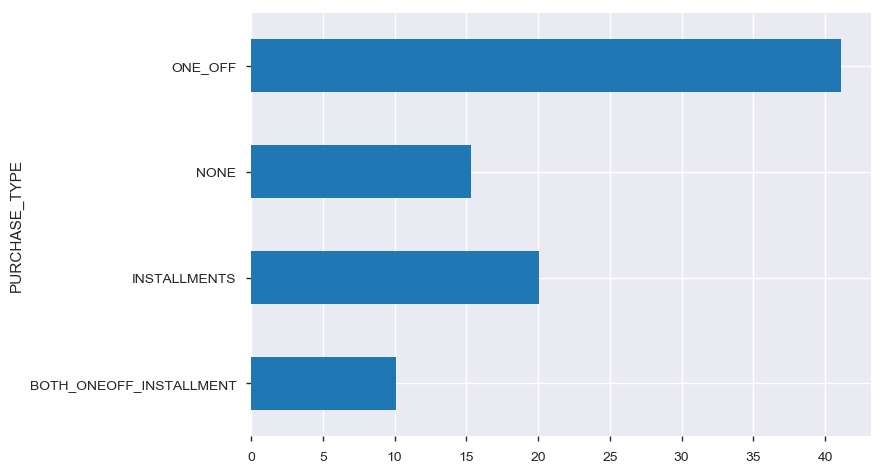

In [26]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['PAYMENT_MINPAYMENT'])).plot.barh()

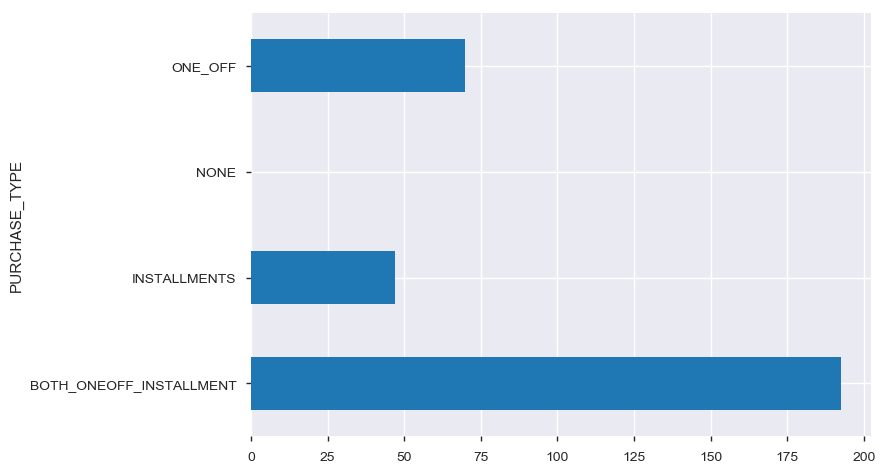

In [27]:
credit.groupby('PURCHASE_TYPE').apply(lambda x : np.mean(x['MNTHLY_AVG_PURCHASE'])).plot.barh()

    2. Data Manipulation

    A. Dividing data between neumeric and catergorical variables and getting the dummies

In [28]:
numeric_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]
print numeric_var_names
print cat_var_names

['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MINIMUM_PAYMENTS', 'MONTHLY_AVG_CASH_ADVANCE', 'PURCHASES', 'LIMIT_USAGE', 'MNTHLY_AVG_PURCHASE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PAYMENTS', 'BALANCE_FREQUENCY', 'CREDIT_LIMIT', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_MINPAYMENT']
['CUST_ID', 'PURCHASE_TYPE']


In [29]:
credit_cat = credit[cat_var_names]

In [30]:
credit_num = credit[numeric_var_names]

In [31]:
credit_cat.head()

CUST_ID PURCHASE_TYPE
0  C10001  INSTALLMENTS
1  C10002          NONE
2  C10003       ONE_OFF
3  C10004       ONE_OFF
4  C10005       ONE_OFF

In [32]:
credit_num.head()

CASH_ADVANCE_TRX  PURCHASES_TRX  MINIMUM_PAYMENTS  \
0                 0              2            139.51   
1                 4              0           1072.34   
2                 0             12            627.28   
3                 1              1              0.00   
4                 0              1            244.79   

   MONTHLY_AVG_CASH_ADVANCE  PURCHASES  LIMIT_USAGE  MNTHLY_AVG_PURCHASE  \
0                      0.00      95.40         0.04                 7.95   
1                    536.91       0.00         0.46                 0.00   
2                      0.00     773.17         0.33                64.43   
3                     17.15    1499.00         0.22               124.92   
4                      0.00      16.00         0.68                 1.33   

   PURCHASES_FREQUENCY  CASH_ADVANCE  PAYMENTS         ...          \
0                 0.17          0.00    201.80         ...           
1                 0.00       6442.95   4103.03         ...           
2                 1.00          0.00    622.07         ...           
3                 0.08        205.79      0.00         ...           
4                 0.08          0.00    678.33         ...           

   CREDIT_LIMIT  CASH_ADVANCE_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0        1000.0                    0.00                        0.00   
1        7000.0                    0.25                        0.00   
2        7500.0                    0.00                        1.00   
3        7500.0                    0.08                        0.08   
4        1200.0                    0.00                        0.08   

   ONEOFF_PURCHASES  BALANCE  PURCHASES_INSTALLMENTS_FREQUENCY  \
0              0.00    40.90                              0.08   
1              0.00  3202.47                              0.00   
2            773.17  2495.15                              0.00   
3           1499.00  1666.67                              0.00   
4             16.00   817.71                              0.00   

   INSTALLMENTS_PURCHASES  PRC_FULL_PAYMENT  TENURE  PAYMENT_MINPAYMENT  
0                    95.4              0.00      12                1.45  
1                     0.0              0.22      12                3.83  
2                     0.0              0.00      12                0.99  
3                     0.0              0.00      12                0.00  
4                     0.0              0.00      12                2.77  

[5 rows x 21 columns]

In [33]:
#Log transformation of neumeric variables
#credit_log = credit_num.applymap(lambda x : np.log(x+1))
credit_log = credit.drop(['CUST_ID', 'PURCHASE_TYPE'],axis=1).applymap(lambda x : np.log(x+1))

In [34]:
get_dummies = pd.get_dummies(data=credit['PURCHASE_TYPE'], prefix='PURCHASE_TYPE', drop_first=True)

In [35]:
get_dummies.head()

PURCHASE_TYPE_INSTALLMENTS  PURCHASE_TYPE_NONE  PURCHASE_TYPE_ONE_OFF
0                           1                   0                      0
1                           0                   1                      0
2                           0                   0                      1
3                           0                   0                      1
4                           0                   0                      1

In [36]:
#Keeping an original copy 
credit_orig = pd.concat([credit,get_dummies], axis=1)

In [37]:
credit_orig.mean()

BALANCE                             1564.474826
BALANCE_FREQUENCY                      0.877426
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871102
PURCHASES_FREQUENCY                    0.490217
ONEOFF_PURCHASES_FREQUENCY             0.202177
PURCHASES_INSTALLMENTS_FREQUENCY       0.364553
CASH_ADVANCE_FREQUENCY                 0.134911
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.282473
PAYMENTS                            1733.143878
MINIMUM_PAYMENTS                     833.983477
PRC_FULL_PAYMENT                       0.153534
TENURE                                11.517318
MNTHLY_AVG_PURCHASE                   86.175139
MONTHLY_AVG_CASH_ADVANCE              88.977987
LIMIT_USAGE                            0.388874
PAYMENT_MINPAYMENT                    20

In [38]:
credit_merge = pd.concat([credit_log,get_dummies], axis=1)

In [39]:
credit_merge.mean()

BALANCE                             6.161638
BALANCE_FREQUENCY                   0.619992
PURCHASES                           4.899647
ONEOFF_PURCHASES                    3.204274
INSTALLMENTS_PURCHASES              3.352403
CASH_ADVANCE                        3.319086
PURCHASES_FREQUENCY                 0.361112
ONEOFF_PURCHASES_FREQUENCY          0.158423
PURCHASES_INSTALLMENTS_FREQUENCY    0.270125
CASH_ADVANCE_FREQUENCY              0.113286
CASH_ADVANCE_TRX                    0.817570
PURCHASES_TRX                       1.894731
CREDIT_LIMIT                        8.094825
PAYMENTS                            6.624541
MINIMUM_PAYMENTS                    5.715084
PRC_FULL_PAYMENT                    0.117550
TENURE                              2.519680
MNTHLY_AVG_PURCHASE                 3.050872
MONTHLY_AVG_CASH_ADVANCE            2.163969
LIMIT_USAGE                         0.296065
PAYMENT_MINPAYMENT                  1.397922
PURCHASE_TYPE_INSTALLMENTS          0.252514
PURCHASE_T

In [40]:
credit_merge.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
MNTHLY_AVG_PURCHASE                 False
MONTHLY_AVG_CASH_ADVANCE            False
LIMIT_USAGE                         False
PAYMENT_MINPAYMENT                  False
PURCHASE_TYPE_INSTALLMENTS          False
PURCHASE_TYPE_NONE                  False
PURCHASE_TYPE_ONE_OFF             

In [41]:
#Getting rid of original variables that are used for creating new KPIs
col = ['BALANCE', 'PURCHASES' ,'PAYMENTS' ,'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CASH_ADVANCE' ,'CREDIT_LIMIT']
credit_new = credit_merge[[x for x in credit_merge.columns if x not in col]]

In [42]:
credit_new.to_csv("credit_new_check.csv")

In [43]:
credit_new.head()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.598837          0.000000                4.568506   
1           0.647103          0.000000                0.000000   
2           0.693147          6.651791                0.000000   
3           0.494696          7.313220                0.000000   
4           0.693147          2.833213                0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.157004                    0.000000   
1             0.000000                    0.000000   
2             0.693147                    0.693147   
3             0.076961                    0.076961   
4             0.076961                    0.076961   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.076961                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.076961          0.693147   
4                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  MNTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  \
0       1.098612             2.191654                  0.000000     0.039221   
1       0.000000             0.000000                  6.287691     0.378436   
2       2.564949             4.180981                  0.000000     0.285179   
3       0.693147             4.835647                  2.898671     0.198851   
4       0.693147             0.845868                  0.000000     0.518794   

   PAYMENT_MINPAYMENT  PURCHASE_TYPE_INSTALLMENTS  PURCHASE_TYPE_NONE  \
0            0.896088                           1                   0   
1            1.574846                           0                   1   
2            0.688135                           0                   0   
3            0.000000                           0                   0   
4            1.327075                           0                   0   

   PURCHASE_TYPE_ONE_OFF  
0                      0  
1                      0  
2                      1  
3                      1  
4                      1

In [44]:
credit_new.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
MNTHLY_AVG_PURCHASE                 float64
MONTHLY_AVG_CASH_ADVANCE            float64
LIMIT_USAGE                         float64
PAYMENT_MINPAYMENT                  float64
PURCHASE_TYPE_INSTALLMENTS            uint8
PURCHASE_TYPE_NONE                    uint8
PURCHASE_TYPE_ONE_OFF                 uint8
dtype: object

    B. Checking for multicollinearity

In [45]:
credit_new_corr=credit_new.corr()

In [46]:
credit_new_corr.to_csv('credit_new_corr.csv')

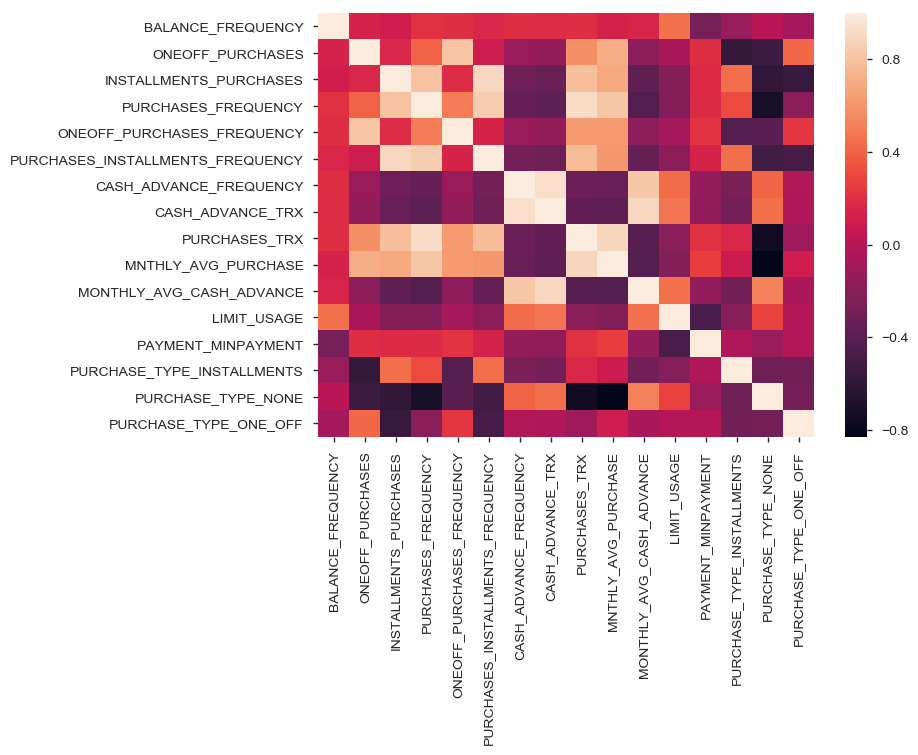

In [47]:
sns.heatmap(credit_new.corr())

    B. Standardizing the data

In [48]:
credit_new.head()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0           0.598837          0.000000                4.568506   
1           0.647103          0.000000                0.000000   
2           0.693147          6.651791                0.000000   
3           0.494696          7.313220                0.000000   
4           0.693147          2.833213                0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.157004                    0.000000   
1             0.000000                    0.000000   
2             0.693147                    0.693147   
3             0.076961                    0.076961   
4             0.076961                    0.076961   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.076961                0.000000          0.000000   
1                          0.000000                0.223144          1.609438   
2                          0.000000                0.000000          0.000000   
3                          0.000000                0.076961          0.693147   
4                          0.000000                0.000000          0.000000   

   PURCHASES_TRX  MNTHLY_AVG_PURCHASE  MONTHLY_AVG_CASH_ADVANCE  LIMIT_USAGE  \
0       1.098612             2.191654                  0.000000     0.039221   
1       0.000000             0.000000                  6.287691     0.378436   
2       2.564949             4.180981                  0.000000     0.285179   
3       0.693147             4.835647                  2.898671     0.198851   
4       0.693147             0.845868                  0.000000     0.518794   

   PAYMENT_MINPAYMENT  PURCHASE_TYPE_INSTALLMENTS  PURCHASE_TYPE_NONE  \
0            0.896088                           1                   0   
1            1.574846                           0                   1   
2            0.688135                           0                   0   
3            0.000000                           0                   0   
4            1.327075                           0                   0   

   PURCHASE_TYPE_ONE_OFF  
0                      0  
1                      0  
2                      1  
3                      1  
4                      1

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
credit_scaled=sc.fit_transform(credit_new)

    C. Applying PCA

In [52]:
from sklearn.decomposition import PCA

In [53]:
var_ratio={}
for n in range(2,15):
    pc = PCA(n_components=n)
    credit_pca=pc.fit(credit_scaled)
    var_ratio[n]=sum(credit_pca.explained_variance_ratio_)

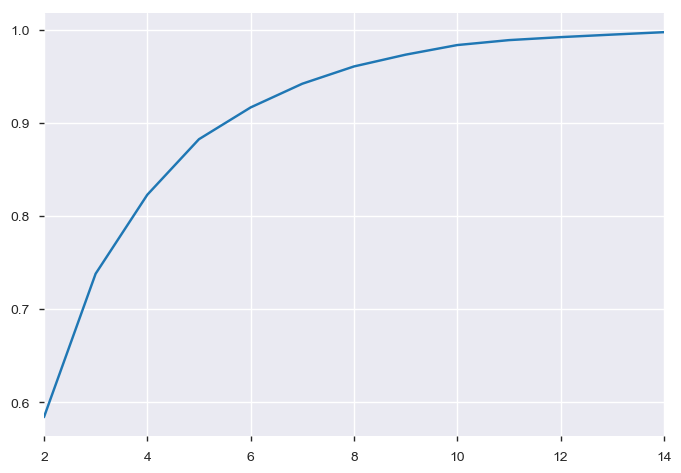

In [54]:
pd.Series(var_ratio).plot()

In [55]:
var_ratio

{2: 0.584178056805434,
 3: 0.73832371403905683,
 4: 0.82318153418759799,
 5: 0.88287829066608281,
 6: 0.91702854611044216,
 7: 0.94250389088991038,
 8: 0.96107618837464426,
 9: 0.97373866113773933,
 10: 0.98407298493089435,
 11: 0.989367253697507,
 12: 0.99257748700336235,
 13: 0.99530819888459787,
 14: 0.99791598529606274}

Since 5 components are explaning about 88% of the variance we select 5 components

In [56]:
col_list = credit_new.columns

In [57]:
col_list

Index([u'BALANCE_FREQUENCY', u'ONEOFF_PURCHASES', u'INSTALLMENTS_PURCHASES',
       u'PURCHASES_FREQUENCY', u'ONEOFF_PURCHASES_FREQUENCY',
       u'PURCHASES_INSTALLMENTS_FREQUENCY', u'CASH_ADVANCE_FREQUENCY',
       u'CASH_ADVANCE_TRX', u'PURCHASES_TRX', u'MNTHLY_AVG_PURCHASE',
       u'MONTHLY_AVG_CASH_ADVANCE', u'LIMIT_USAGE', u'PAYMENT_MINPAYMENT',
       u'PURCHASE_TYPE_INSTALLMENTS', u'PURCHASE_TYPE_NONE',
       u'PURCHASE_TYPE_ONE_OFF'],
      dtype='object')

In [58]:
pc_final=PCA(n_components=5).fit(credit_scaled)
reduced_cr=pc_final.fit_transform(credit_scaled)

In [59]:
reduced_cr.shape

(8950L, 5L)

In [60]:
credit_scaled.shape

(8950L, 16L)

In [61]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(5)], index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                -0.016314  0.222138 -0.337015 -0.381015   
ONEOFF_PURCHASES                 -0.198430  0.467001  0.150216  0.031266   
INSTALLMENTS_PURCHASES           -0.315886 -0.131478 -0.301824  0.102463   
PURCHASES_FREQUENCY              -0.354096  0.038607 -0.197713  0.014130   
ONEOFF_PURCHASES_FREQUENCY       -0.203255  0.416693  0.076657  0.069788   
PURCHASES_INSTALLMENTS_FREQUENCY -0.302884 -0.138420 -0.321530  0.064054   
CASH_ADVANCE_FREQUENCY            0.236451  0.224095 -0.319842  0.256911   
CASH_ADVANCE_TRX                  0.253215  0.225024 -0.324812  0.254171   
PURCHASES_TRX                    -0.358897  0.137785 -0.152819  0.031271   
MNTHLY_AVG_PURCHASE              -0.350250  0.197306 -0.037328  0.026040   
MONTHLY_AVG_CASH_ADVANCE          0.267012  0.196877 -0.288251  0.254370   
LIMIT_USAGE                       0.162853  0.200136 -0.303823 -0.396170   
PAYMENT_MINPAYMENT               -0.115933 -0.003984  0.173762  0.648505   
PURCHASE_TYPE_INSTALLMENTS       -0.114478 -0.440677 -0.155512 -0.084330   
PURCHASE_TYPE_NONE                0.324311 -0.079520 -0.053299  0.107893   
PURCHASE_TYPE_ONE_OFF             0.033026  0.287881  0.399055 -0.202360   

                                      PC_4  
BALANCE_FREQUENCY                -0.269712  
ONEOFF_PURCHASES                 -0.059372  
INSTALLMENTS_PURCHASES           -0.045140  
PURCHASES_FREQUENCY               0.035783  
ONEOFF_PURCHASES_FREQUENCY       -0.213939  
PURCHASES_INSTALLMENTS_FREQUENCY -0.038159  
CASH_ADVANCE_FREQUENCY            0.272504  
CASH_ADVANCE_TRX                  0.245396  
PURCHASES_TRX                     0.028495  
MNTHLY_AVG_PURCHASE               0.155113  
MONTHLY_AVG_CASH_ADVANCE          0.168111  
LIMIT_USAGE                      -0.030045  
PAYMENT_MINPAYMENT               -0.127206  
PURCHASE_TYPE_INSTALLMENTS        0.441483  
PURCHASE_TYPE_NONE               -0.479012  
PURCHASE_TYPE_ONE_OFF             0.494096

In [62]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(5)])

PC_0    0.404681
PC_1    0.179497
PC_2    0.154146
PC_3    0.084858
PC_4    0.059697
dtype: float64

In [63]:
type(credit_pca)

sklearn.decomposition.pca.PCA

#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [64]:
#pc_final.components_

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=credit_new.columns).T

In [65]:
Loadings.to_csv("Loadings.csv")

    D. Clustering

#### Silhouette Coefficient

In [66]:
from sklearn import metrics
#metrics.silhouette_score(credit_scaled, km_4.labels_)

In [67]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(credit_scaled)
    scores.append(metrics.silhouette_score(credit_scaled, km.labels_))

In [68]:
scores

[0.33049780975186205,
 0.35254923736128763,
 0.35409190307898808,
 0.34934899280003545,
 0.34465319682342022,
 0.34716405229468206,
 0.32943783140603805,
 0.32019890173810928,
 0.30583972202879933]

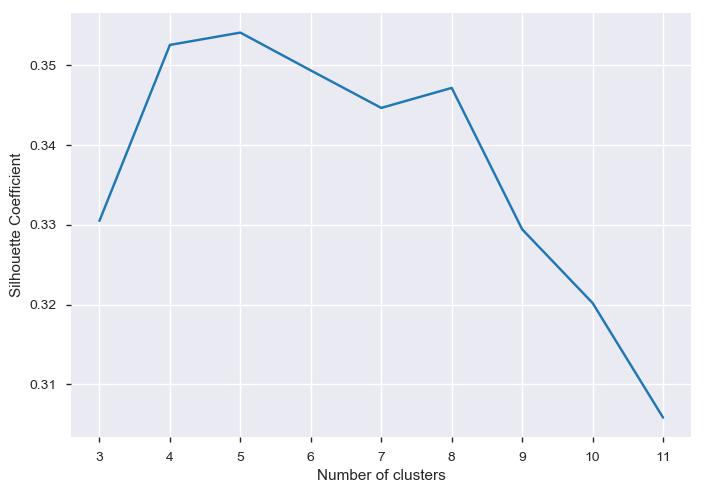

In [69]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Note

The solution can be 4 or 5 or 8

After doing cluster solution for 4, 5 and 8 cluster; we see 4 cluster solution gives more distinguishable characteristics


### Overall Profiling report for K MEANS -

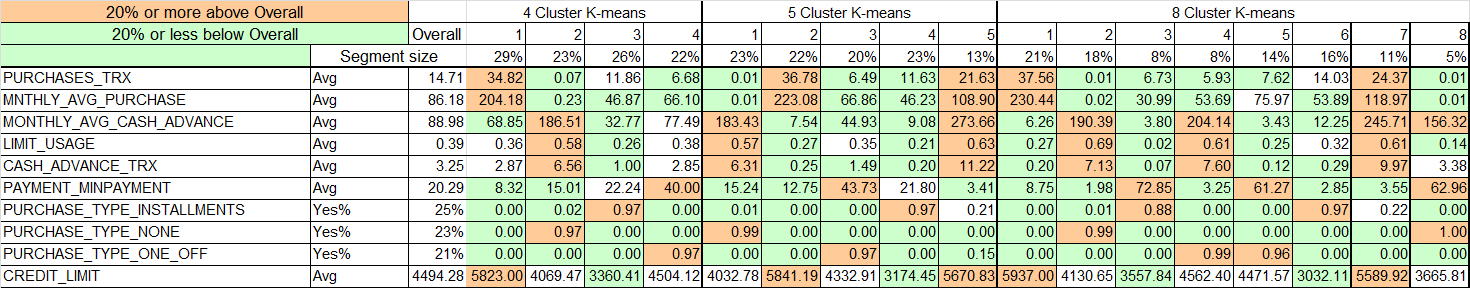


#### 4 Clusters solution are clearly distinguishing with follwing references -

<B> Cluster 1 </B> - This group is about 29% of the total customer base.
This group of customers have highest monthly Avarage Purchases and have good Credit Score.
This group is doing both installment as well as on off purchases and have comparetively low minimum payment.

<B> Cluster 2 </B> - This group is about 23% of the total customer base.
This group is taking maximum cash advance and has poor credit score.
This group is more inclined to NO purchase transaction.

<B> Cluster 3 </B> - This group is about 26% of the total customer base.
This group is paying dues and are doing maximum installment purchase.

<B> Cluster 4 </B> - This group is about 22% of the total customer base.
This group is more inclined to ON_OFF purchases and have high minimum payment.

#### For 5 cluster solution - do not have distinguishable features -
<B> Cluster 1 and Cluster 5 </B> overlaps each other on cash advance and credits score
<B> Cluster 2 and Cluster 5 </B> overlaps each other on monthly purchases

#### For 4 cluster Solution behavior  -

In [70]:
from sklearn.cluster import KMeans

In [71]:
km_4=KMeans(n_clusters=4,random_state=123)

In [72]:
km_4.fit(reduced_cr)
km_4.labels_

array([2, 1, 3, ..., 2, 1, 3])

In [73]:
pd.Series(km_4.labels_).value_counts()

0    2622
2    2304
1    2096
3    1928
dtype: int64

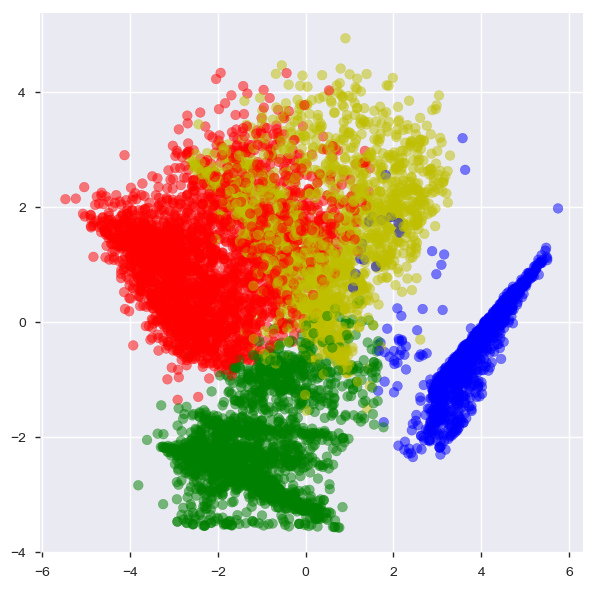

In [74]:
color_map={0:'r', 1:'b', 2:'g', 3:'y'}
label_color = [color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=label_color,cmap='Spectral',alpha=0.5)

In [75]:
#Key Performance variables - dropping variables that are used in deriving new KPI
col_kpi = ['PURCHASES_TRX','MNTHLY_AVG_PURCHASE','MONTHLY_AVG_CASH_ADVANCE','LIMIT_USAGE','CASH_ADVANCE_TRX','PAYMENT_MINPAYMENT','PURCHASE_TYPE_INSTALLMENTS','PURCHASE_TYPE_NONE','PURCHASE_TYPE_ONE_OFF','CREDIT_LIMIT']

In [76]:
cluster_df_4=pd.concat([credit_orig[col_kpi], pd.Series(km_4.labels_, name='Cluster_4')], axis=1)

In [77]:
cluster_4=cluster_df_4.groupby('Cluster_4').apply(lambda x : x[col_kpi].mean()).T
cluster_4

Cluster_4                             0            1            2            3
PURCHASES_TRX                 34.819985     0.068702    11.864149     6.678423
MNTHLY_AVG_PURCHASE          204.180599     0.225711    46.869102    66.102936
MONTHLY_AVG_CASH_ADVANCE      68.852487   186.505324    32.772439    77.489056
LIMIT_USAGE                    0.360572     0.576536     0.258381     0.379289
CASH_ADVANCE_TRX               2.872616     6.561069     0.999132     2.848029
PAYMENT_MINPAYMENT             8.320160    15.005510    22.240382    40.001670
PURCHASE_TYPE_INSTALLMENTS     0.000000     0.015267     0.967014     0.000000
PURCHASE_TYPE_NONE             0.000000     0.974237     0.000000     0.000000
PURCHASE_TYPE_ONE_OFF          0.002288     0.002863     0.000000     0.965768
CREDIT_LIMIT                5822.995015  4069.473602  3360.409453  4504.115742

In [78]:
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100, name = 'Percentage')
print "Cluster KMEANS - 4", '\n'
print pd.concat([pd.Series(s.values, name='Size'), per],axis=1), '\n'

Cluster KMEANS - 4 

   Size  Percentage
0  2622   29.296089
1  2096   23.418994
2  2304   25.743017
3  1928   21.541899 



In [79]:
credit_orig[col_kpi].mean()

PURCHASES_TRX                   14.709832
MNTHLY_AVG_PURCHASE             86.175139
MONTHLY_AVG_CASH_ADVANCE        88.977987
LIMIT_USAGE                      0.388874
CASH_ADVANCE_TRX                 3.248827
PAYMENT_MINPAYMENT              20.294086
PURCHASE_TYPE_INSTALLMENTS       0.252514
PURCHASE_TYPE_NONE               0.228156
PURCHASE_TYPE_ONE_OFF            0.209385
CREDIT_LIMIT                  4494.282473
dtype: float64

#### For 5 cluster Solution behavior  -

In [80]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5.fit(reduced_cr)
km_5.labels_

array([3, 0, 2, ..., 3, 0, 2])

In [81]:
pd.Series(km_5.labels_).value_counts()

3    2064
0    2058
1    1958
2    1749
4    1121
dtype: int64

Text(0.5,0,u'PC_1')

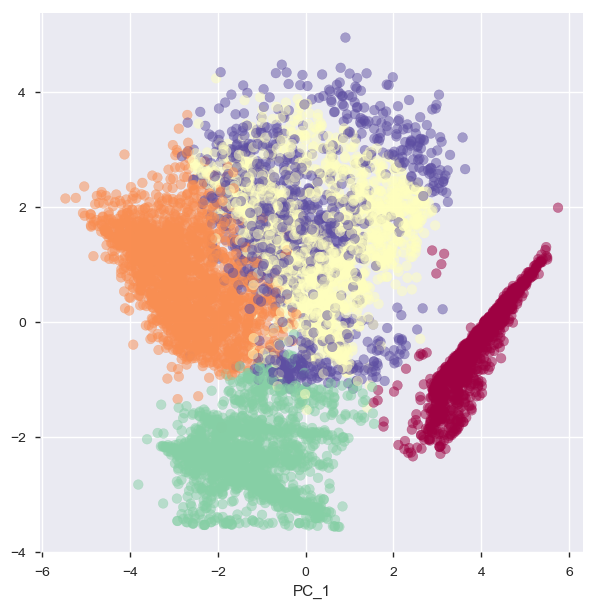

In [82]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.xlabel('PC_1')

In [83]:
cluster_df_5=pd.concat([credit_orig[col_kpi], pd.Series(km_5.labels_, name='Cluster_5')], axis=1)

In [84]:
cluster_5=cluster_df_5.groupby('Cluster_5').apply(lambda x : x[col_kpi].mean()).T
cluster_5

Cluster_5                             0            1            2  \
PURCHASES_TRX                  0.008746    36.782942     6.492281   
MNTHLY_AVG_PURCHASE            0.012692   223.080424    66.864420   
MONTHLY_AVG_CASH_ADVANCE     183.426069     7.541006    44.933419   
LIMIT_USAGE                    0.574266     0.273958     0.350183   
CASH_ADVANCE_TRX               6.314383     0.252809     1.487707   
PAYMENT_MINPAYMENT            15.235394    12.747441    43.732882   
PURCHASE_TYPE_INSTALLMENTS     0.005831     0.000000     0.000000   
PURCHASE_TYPE_NONE             0.992225     0.000000     0.000000   
PURCHASE_TYPE_ONE_OFF          0.001944     0.003064     0.969125   
CREDIT_LIMIT                4032.782638  5841.186379  4332.907461   

Cluster_5                             3            4  
PURCHASES_TRX                 11.631783    21.633363  
MNTHLY_AVG_PURCHASE           46.231696   108.904380  
MONTHLY_AVG_CASH_ADVANCE       9.076904   273.660624  
LIMIT_USAGE                    0.214419     0.630812  
CASH_ADVANCE_TRX               0.195736    11.223015  
PAYMENT_MINPAYMENT            21.803784     3.413310  
PURCHASE_TYPE_INSTALLMENTS     0.974322     0.211418  
PURCHASE_TYPE_NONE             0.000000     0.000000  
PURCHASE_TYPE_ONE_OFF          0.000000     0.150758  
CREDIT_LIMIT                3174.449312  5670.829616

In [85]:
s=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
per=pd.Series((s.values.astype('float')/ cluster_df_5.shape[0])*100, name = 'Percentage')
print "Cluster KMEANS - 5", '\n'
print pd.concat([pd.Series(s.values, name='Size'), per],axis=1), '\n'

Cluster KMEANS - 5 

   Size  Percentage
0  2058   22.994413
1  1958   21.877095
2  1749   19.541899
3  2064   23.061453
4  1121   12.525140 



#### For 8 cluster Solution behavior  -

In [86]:
km_8=KMeans(n_clusters=8,random_state=123)
km_8.fit(reduced_cr)
km_8.labels_

array([2, 1, 4, ..., 5, 7, 3])

In [87]:
pd.Series(km_8.labels_).value_counts()

0    1839
1    1607
5    1474
4    1223
6     977
3     706
2     677
7     447
dtype: int64

Text(0.5,0,u'PC_1')

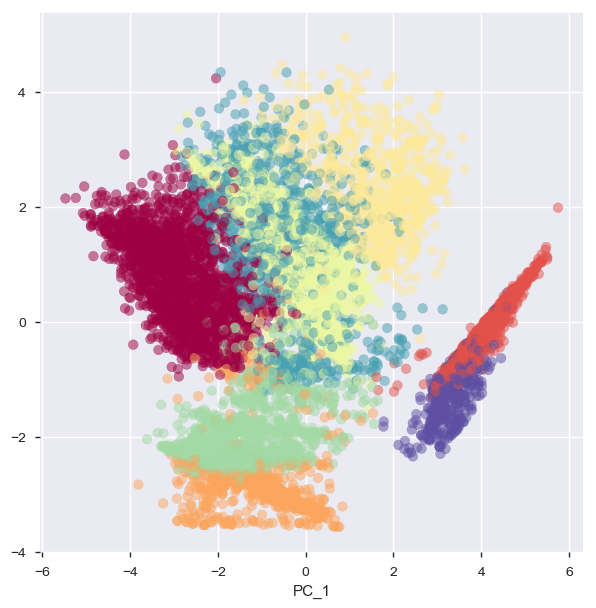

In [88]:

plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_8.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.xlabel('PC_1')

In [89]:
cluster_df_8=pd.concat([credit_orig[col_kpi], pd.Series(km_8.labels_, name='Cluster_8')], axis=1)

In [90]:
Cluster_8=cluster_df_8.groupby('Cluster_8').apply(lambda x : x[col_kpi].mean()).T
Cluster_8

Cluster_8                             0            1            2  \
PURCHASES_TRX                 37.561718     0.007467     6.726736   
MNTHLY_AVG_PURCHASE          230.438396     0.017156    30.988715   
MONTHLY_AVG_CASH_ADVANCE       6.259723   190.385893     3.803205   
LIMIT_USAGE                    0.265514     0.694978     0.018863   
CASH_ADVANCE_TRX               0.202828     7.133167     0.066470   
PAYMENT_MINPAYMENT             8.745633     1.984835    72.848346   
PURCHASE_TYPE_INSTALLMENTS     0.000000     0.006845     0.881832   
PURCHASE_TYPE_NONE             0.000000     0.993155     0.000000   
PURCHASE_TYPE_ONE_OFF          0.000544     0.000000     0.000000   
CREDIT_LIMIT                5936.999962  4130.647169  3557.837681   

Cluster_8                             3            4            5  \
PURCHASES_TRX                  5.930595     7.623876    14.031886   
MNTHLY_AVG_PURCHASE           53.693697    75.968790    53.888915   
MONTHLY_AVG_CASH_ADVANCE     204.141416     3.433083    12.251499   
LIMIT_USAGE                    0.605382     0.245936     0.322252   
CASH_ADVANCE_TRX               7.603399     0.121832     0.292402   
PAYMENT_MINPAYMENT             3.251431    61.267899     2.850482   
PURCHASE_TYPE_INSTALLMENTS     0.000000     0.000000     0.972185   
PURCHASE_TYPE_NONE             0.000000     0.000000     0.000000   
PURCHASE_TYPE_ONE_OFF          0.992918     0.958299     0.000000   
CREDIT_LIMIT                4562.400212  4471.570401  3032.108053   

Cluster_8                             6            7  
PURCHASES_TRX                 24.374616     0.006711  
MNTHLY_AVG_PURCHASE          118.967697     0.006868  
MONTHLY_AVG_CASH_ADVANCE     245.712774   156.317360  
LIMIT_USAGE                    0.610768     0.140134  
CASH_ADVANCE_TRX               9.967247     3.378076  
PAYMENT_MINPAYMENT             3.549539    62.964720  
PURCHASE_TYPE_INSTALLMENTS     0.223132     0.002237  
PURCHASE_TYPE_NONE             0.000000     0.997763  
PURCHASE_TYPE_ONE_OFF          0.000000     0.000000  
CREDIT_LIMIT                5589.918117  3665.809105

In [91]:
s=cluster_df_8.groupby('Cluster_8').apply(lambda x: x['Cluster_8'].value_counts())
per=pd.Series((s.values.astype('float')/ cluster_df_8.shape[0])*100, name = 'Percentage')
print "Cluster KMEANS - 8", '\n'
print pd.concat([pd.Series(s.values, name='Size'), per],axis=1), '\n'

Cluster KMEANS - 8 

   Size  Percentage
0  1839   20.547486
1  1607   17.955307
2   677    7.564246
3   706    7.888268
4  1223   13.664804
5  1474   16.469274
6   977   10.916201
7   447    4.994413 



#### We can conclude with confidence that 4 CLUSTER should be best solution since it is giving us perfectly distinguishable features

    ***************************************** THANK YOU ****************************************************